In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 한글 폰트 설정 추가
plt.rcParams['font.family'] = 'AppleGothic'  # macOS인 경우
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows인 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


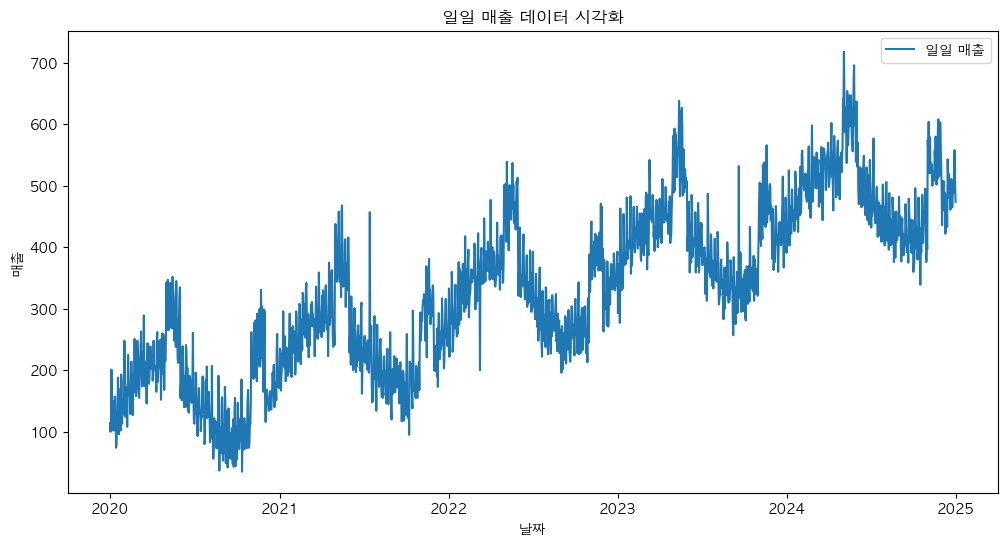

In [4]:
# 1. 데이터 로드 및 확인
df = pd.read_csv('data/realistic_sales_data.csv', parse_dates=['date'])
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# 데이터 시각화로 기본 패턴 확인
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='일일 매출')
plt.title('일일 매출 데이터 시각화')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.legend()
plt.show()



In [5]:
# 2. 휴일 및 프로모션 이벤트 추가
# 실무에서는 회사의 프로모션 일정이나 공휴일을 반영하는 것이 중요
holidays = pd.DataFrame({
    'holiday': ['new_year', 'promotion_may', 'promotion_nov', 'black_friday'],
    'ds': pd.to_datetime(['2020-01-01', '2021-05-15', '2022-11-20', '2023-11-24']),
    'lower_window': 0,
    'upper_window': 1
})



01:44:36 - cmdstanpy - INFO - Chain [1] start processing
01:44:39 - cmdstanpy - INFO - Chain [1] done processing


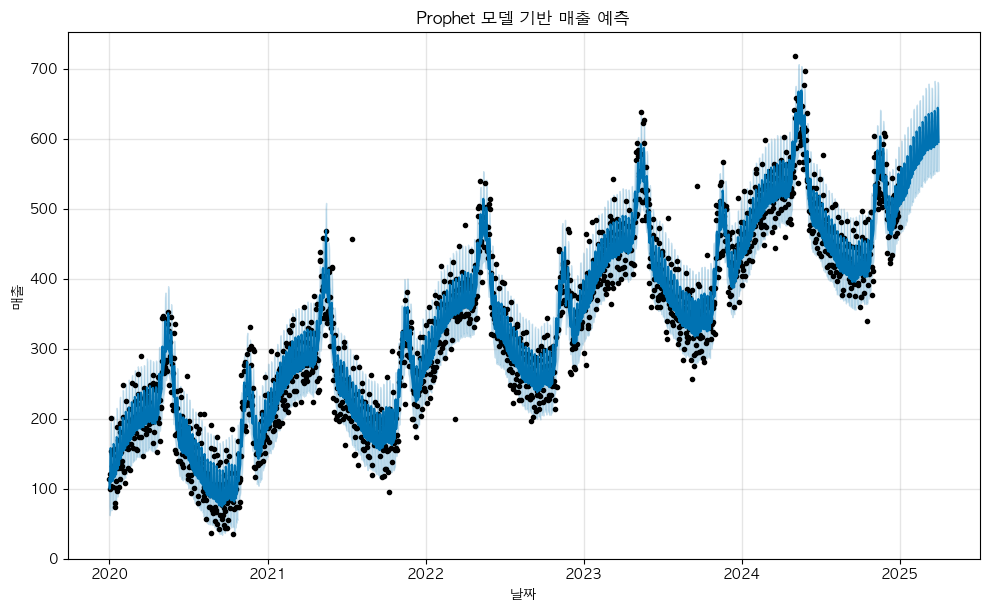

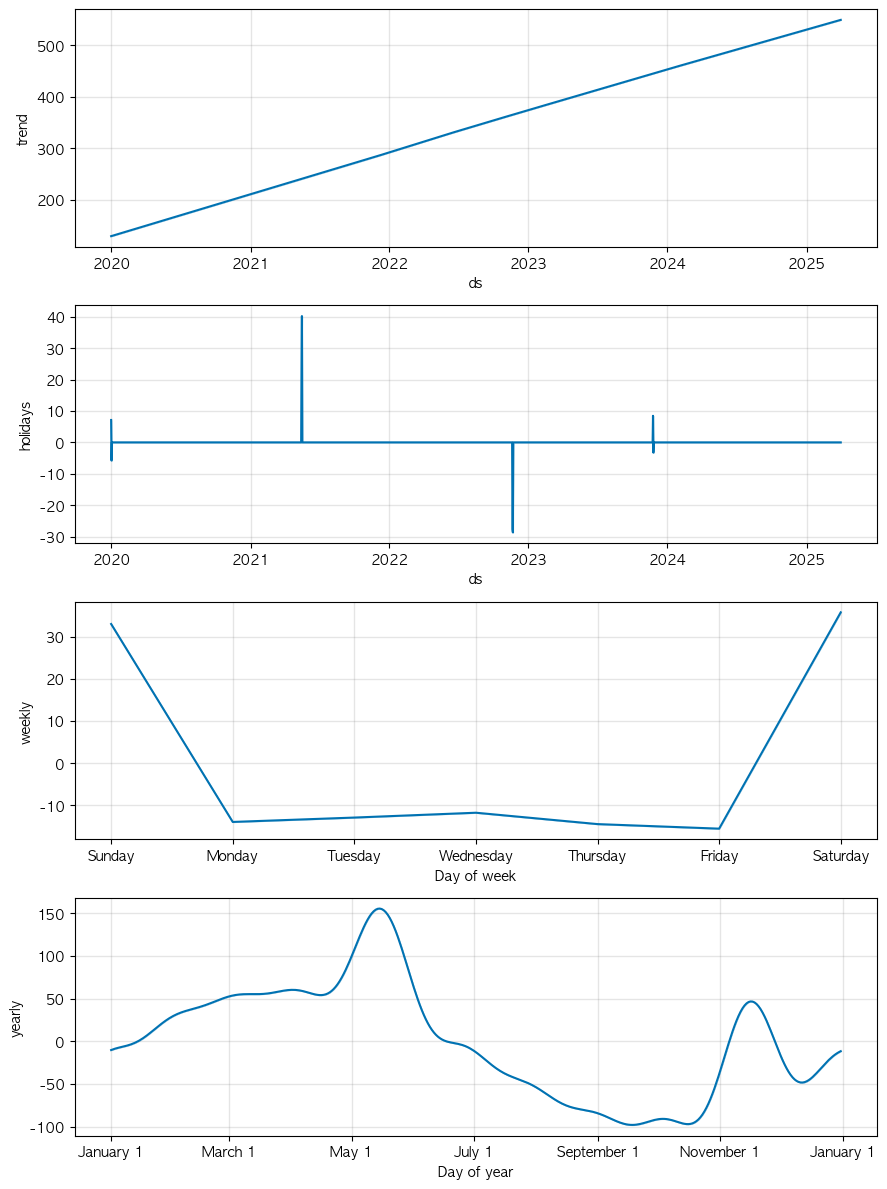

In [6]:
# 3. Prophet 모델 초기화 및 설정
model = Prophet(
    yearly_seasonality=True,   # 연간 계절성 반영
    weekly_seasonality=True,   # 주간 계절성 반영
    daily_seasonality=False,   # 일간 계절성은 사용하지 않음
    holidays=holidays,         # 휴일 효과 반영
    changepoint_prior_scale=0.1  # 추세 변화 감지 민감도 (높일수록 민감)
)

# 4. 모델 학습
model.fit(df)

# 5. 미래 데이터 생성 및 예측 (향후 90일 예측)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 6. 예측 결과 시각화
fig1 = model.plot(forecast)
plt.title('Prophet 모델 기반 매출 예측')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.show()

# 7. 트렌드 및 계절성 분해 시각화
fig2 = model.plot_components(forecast)
plt.show()

# 8. 예측 데이터 저장
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('sales_forecast_results.csv', index=False)